In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../calibrated data/SB2_data_orth.npy")       # rename your 2D array
waveem = np.load("../calibrated data/SB2_waveem_orth.npy")

window_size = 5
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    noise = make_noise(df_cut)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    pp, gas_templates = run_ppxf(lam, fwhm, velscale, df_rb, noise)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       764       178
 comp.  1:      -149       160
 comp.  2:      -116       153
chi2/DOF: 0.5550; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      17.41       2.1    -149   160
Comp:  2           [NII]6583_d      10.87       2.7    -116   153
-----------------------------------------------------------------
pPXF fit done in 10.22 s
PIXEL: 152
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeI

 Best Fit:       Vel     sigma
 comp.  0:        50       826
 comp.  1:       -14       194
 comp.  2:       -50        95
chi2/DOF: 0.6381; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 122; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      6.454       1.2     -14   194
Comp:  2           [NII]6583_d      6.017       1.2     -50    95
-----------------------------------------------------------------
pPXF fit done in 10.68 s
PIXEL: 161
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       288       850
 comp.  1:       -18       180
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -209       778
 comp.  1:       -90       198
 comp.  2:         5       157
chi2/DOF: 0.5842; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.969      0.72     -90   198
Comp:  2           [NII]6583_d      5.074      0.84       5   157
-----------------------------------------------------------------
pPXF fit done in 9.13 s
PIXEL: 171
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      -187       569
 comp.  1:      -185       183
 comp.  2:      -156       326
chi2/DOF: 0.5869; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 4; Func calls: 70; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.427      0.81    -185   183
Comp:  2           [NII]6583_d      4.001       1.3    -156   326
-----------------------------------------------------------------
pPXF fit done in 4.29 s
PIXEL: 180
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       -89       601
 comp.  1:      -191       212
 comp.  2:     

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -266       483
 comp.  1:      -116       260
 comp.  2:      -104       274
chi2/DOF: 0.05549; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 104; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      6.252       1.3    -116   260
Comp:  2           [NII]6583_d      8.850       1.7    -104   274
-----------------------------------------------------------------
pPXF fit done in 11.38 s
PIXEL: 190
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'He

 Best Fit:       Vel     sigma
 comp.  0:        35       476
 comp.  1:        50       193
 comp.  2:       -10       149
chi2/DOF: 0.7745; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 4; Func calls: 70; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 5/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      8.407       2.0      50   193
Comp:  2           [NII]6583_d      7.048       2.3     -10   149
-----------------------------------------------------------------
pPXF fit done in 6.43 s
PIXEL: 199
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        39      1000
 comp.  1:        46       205
 comp.  2:     

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       674       511
 comp.  1:       -28       190
 comp.  2:       -42       179
chi2/DOF: 0.6249; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 89; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      13.58       2.3     -28   190
Comp:  2           [NII]6583_d      9.743       2.8     -42   179
-----------------------------------------------------------------
pPXF fit done in 22.58 s
PIXEL: 209
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII

 Best Fit:       Vel     sigma
 comp.  0:      1070       134
 comp.  1:       -16       171
 comp.  2:       -53       207
chi2/DOF: 0.8447; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 11; Func calls: 192; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      3.019       2.1     -16   171
Comp:  2           [NII]6583_d      7.624       2.8     -53   207
-----------------------------------------------------------------
pPXF fit done in 19.48 s
PIXEL: 218
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:       356       606
 comp.  1:        58       218
 comp.  2:  

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:        87       500
 comp.  1:        -1       156
 comp.  2:      -105       169
chi2/DOF: 0.5539; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 4; Func calls: 73; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      15.82       1.6      -1   156
Comp:  2           [NII]6583_d      11.37       2.0    -105   169
-----------------------------------------------------------------
pPXF fit done in 0.71 s
PIXEL: 228
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4

 Best Fit:       Vel     sigma
 comp.  0:      2000       817
 comp.  1:       -71         9
 comp.  2:       -42         1
chi2/DOF: 0.6879; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 177; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 1/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       8.5     -71     9
Comp:  2           [NII]6583_d      0.000       11.     -42     1
-----------------------------------------------------------------
pPXF fit done in 2.49 s
PIXEL: 237
Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      1912       848
 comp.  1:      -124         1
 comp.  2:   

Emission lines included in gas templates:
['Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[SII]6731' 'HeII4687'
 'HeI5876' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:      -959         1
 comp.  1:        -0       200
 comp.  2:       615         1
chi2/DOF: 0.8567; DOF: 1607; degree = -1; mdegree = 10
method = capfit; Jac calls: 12; Func calls: 215; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       34.      -0   200
Comp:  2           [NII]6583_d      397.1       31.     615     1
-----------------------------------------------------------------
pPXF fit done in 1.89 s
PIXEL: 247


Peak flux at 188 px


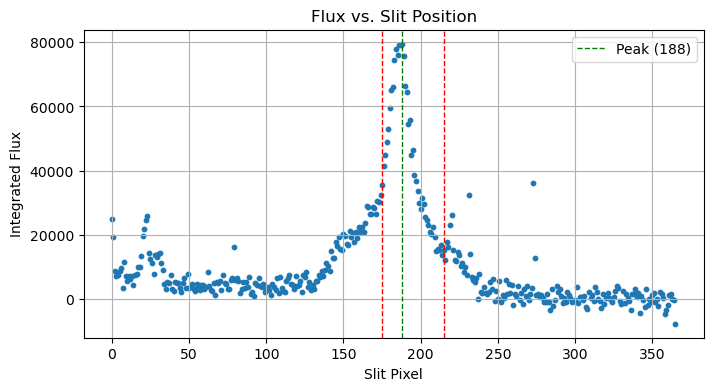

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 177


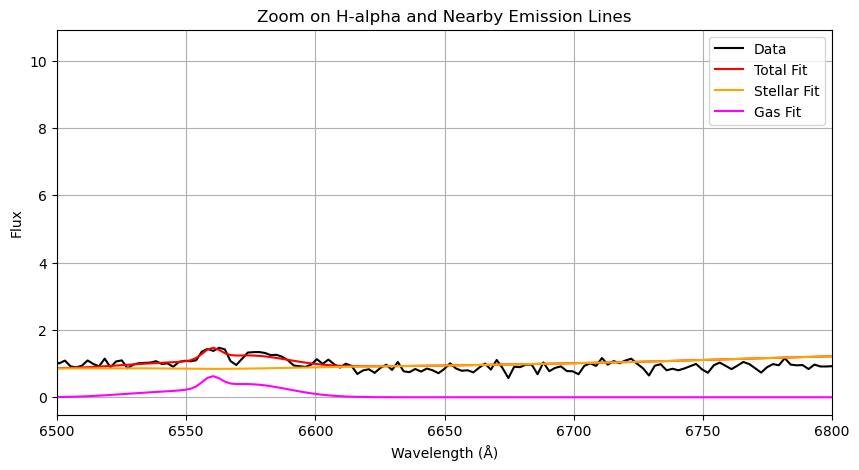

σ (km/s): 103.09

Window centre: 178


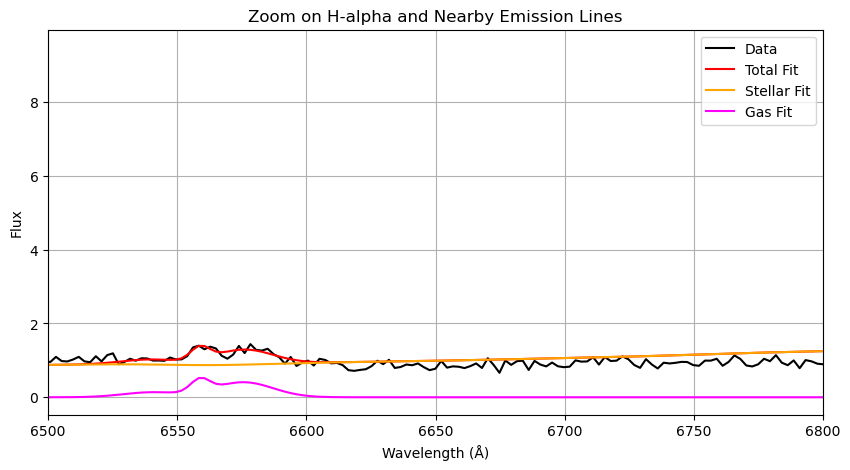

σ (km/s): 118.06

Window centre: 179


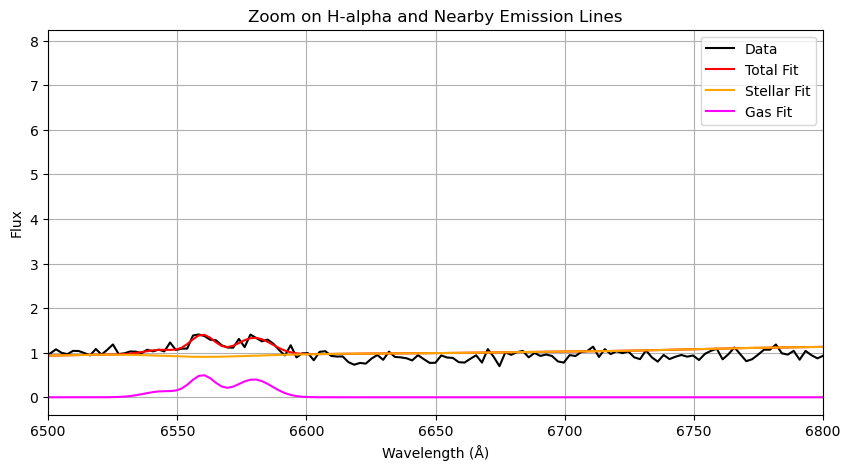

σ (km/s): 188.98

Window centre: 180


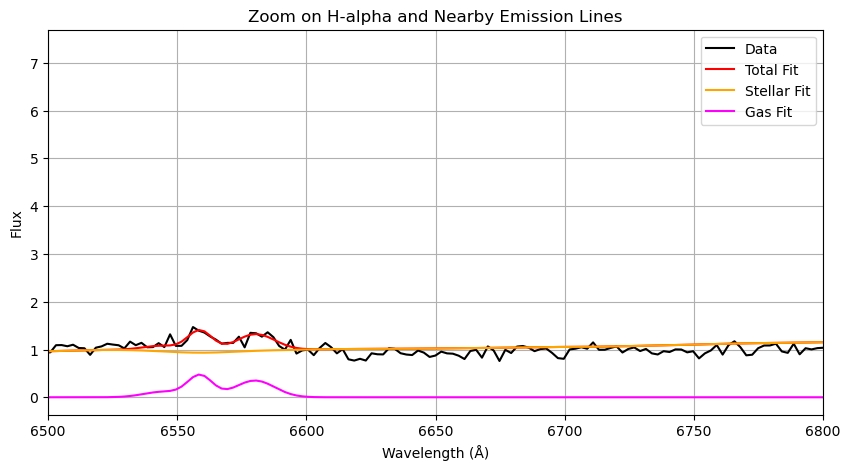

σ (km/s): 182.66

Window centre: 181


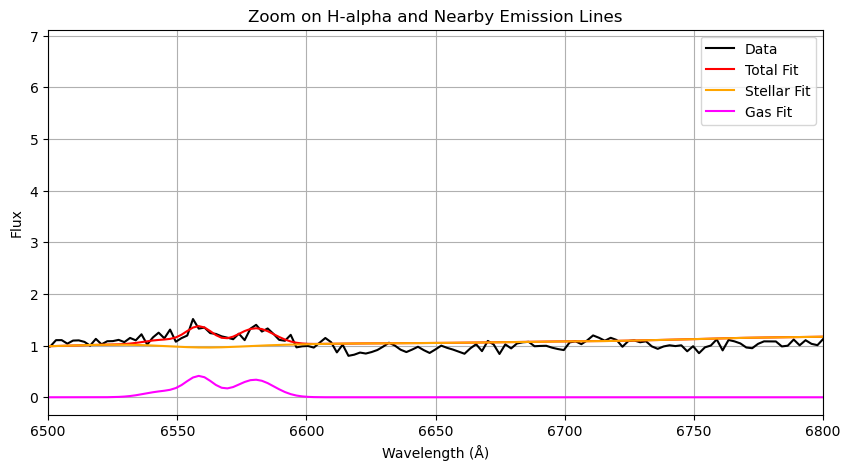

σ (km/s): 211.57

Window centre: 182


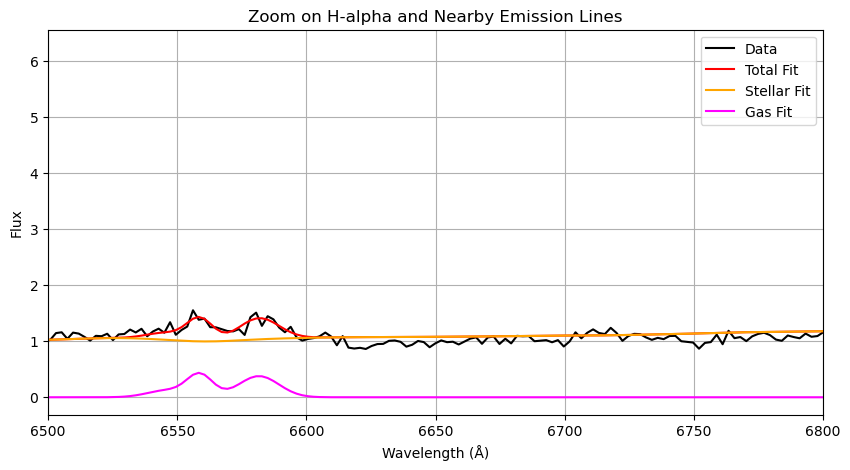

σ (km/s): 193.05

Window centre: 183


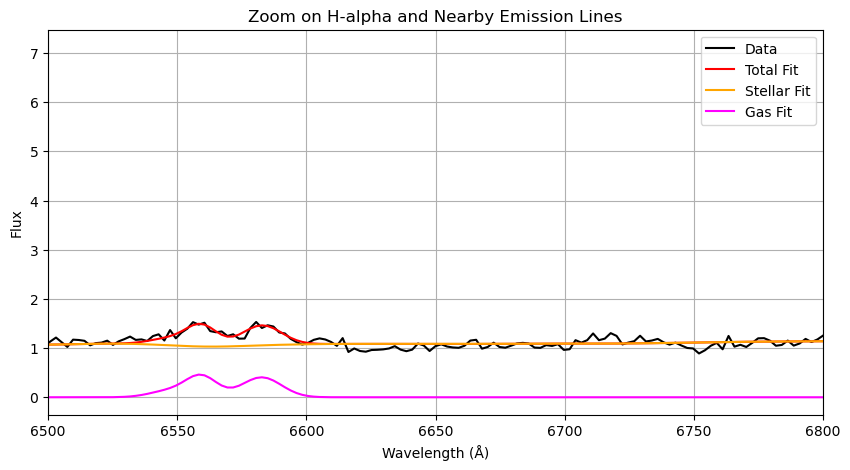

σ (km/s): 248.36

Window centre: 184


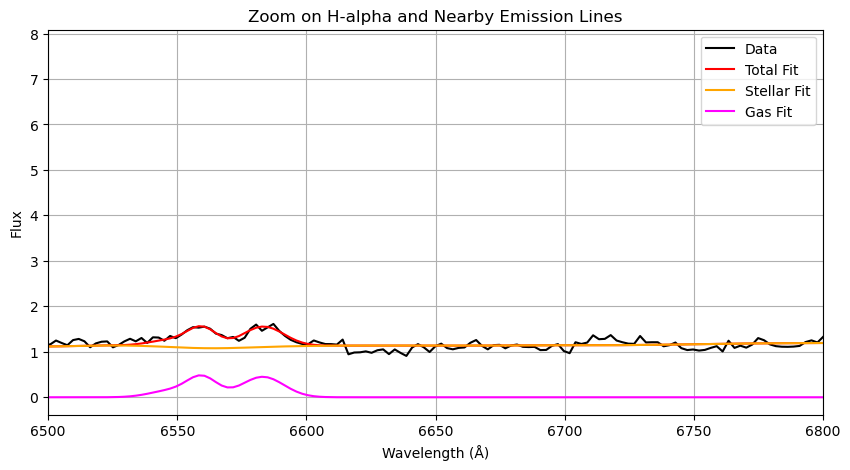

σ (km/s): 235.81

Window centre: 185


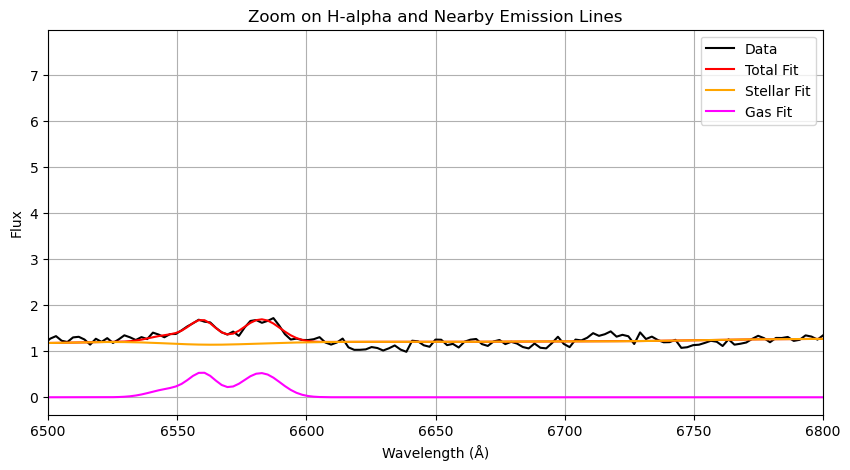

σ (km/s): 211.13

Window centre: 186


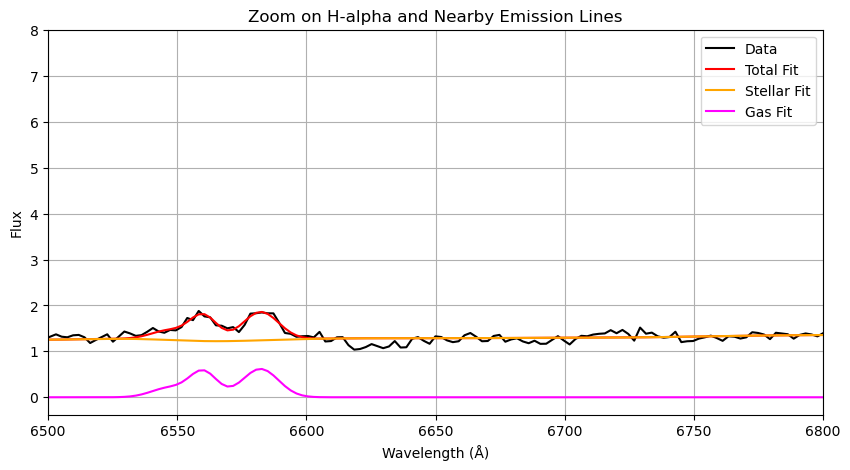

σ (km/s): 213.70

Window centre: 187


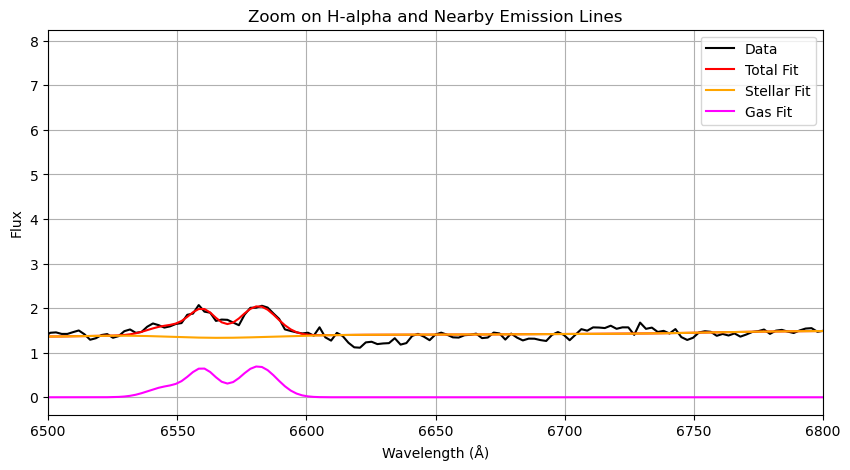

σ (km/s): 217.00

Window centre: 188


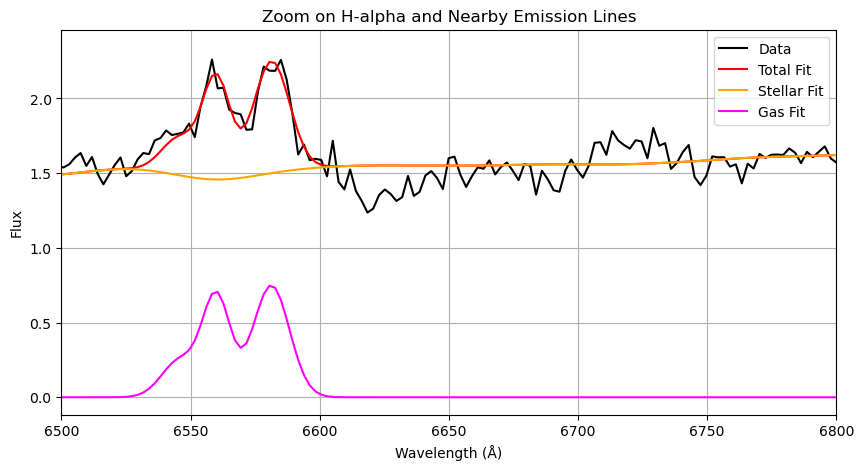

σ (km/s): 216.19

Window centre: 189


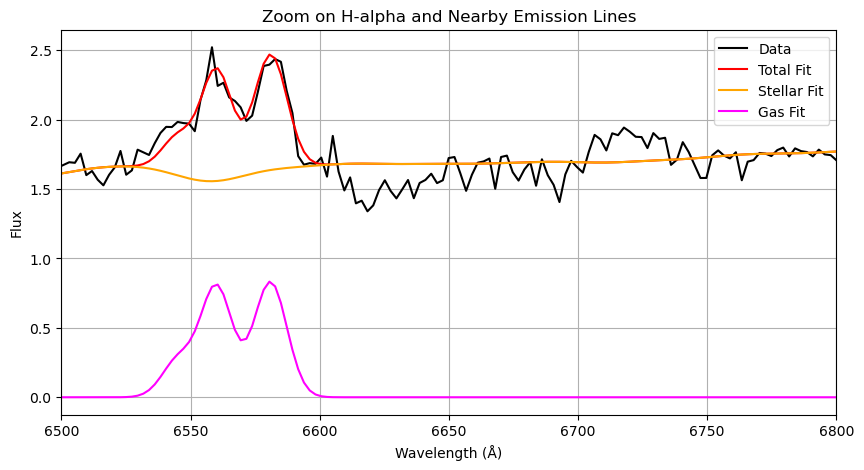

σ (km/s): 251.17

Window centre: 190


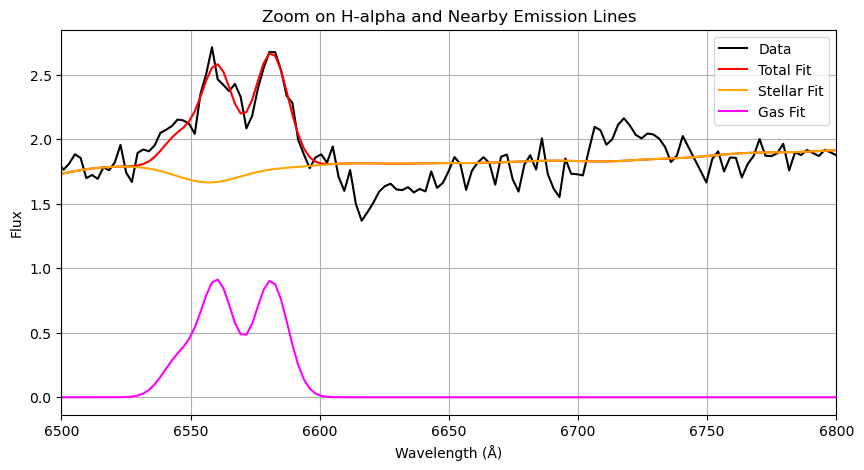

σ (km/s): 260.24

Window centre: 191


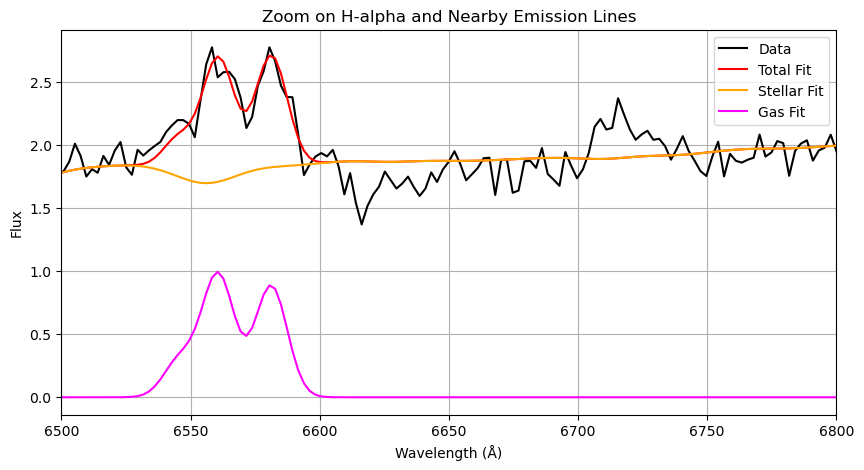

σ (km/s): 262.83

Window centre: 192


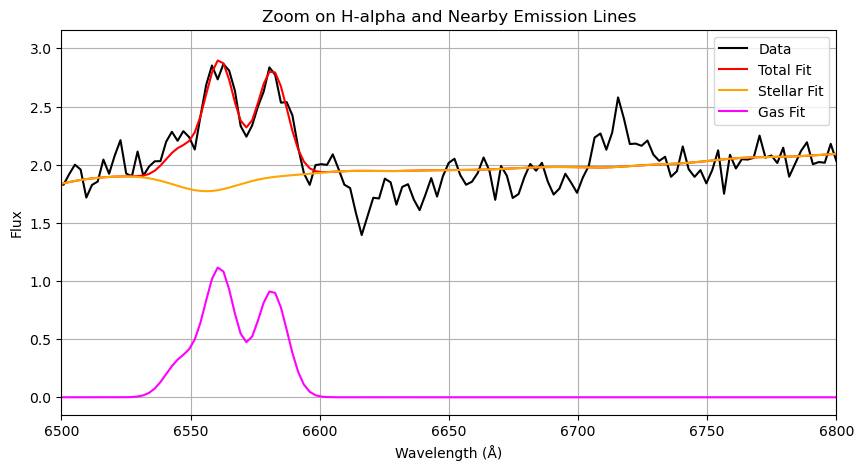

σ (km/s): 243.17

Window centre: 193


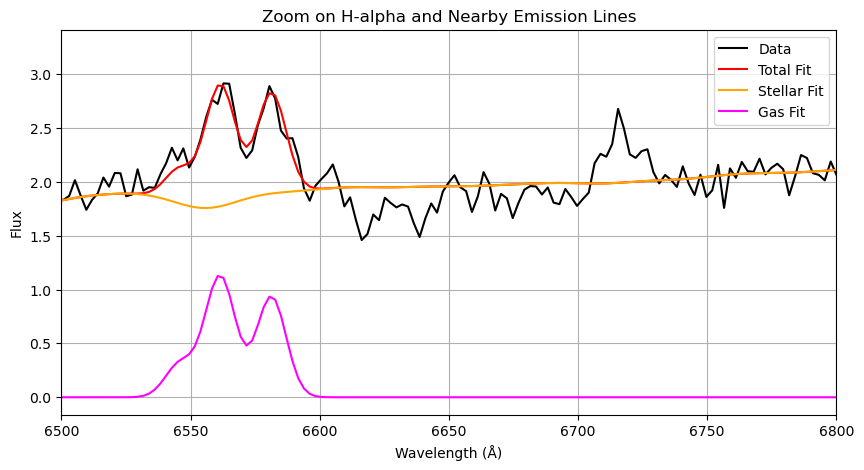

σ (km/s): 242.68

Window centre: 194


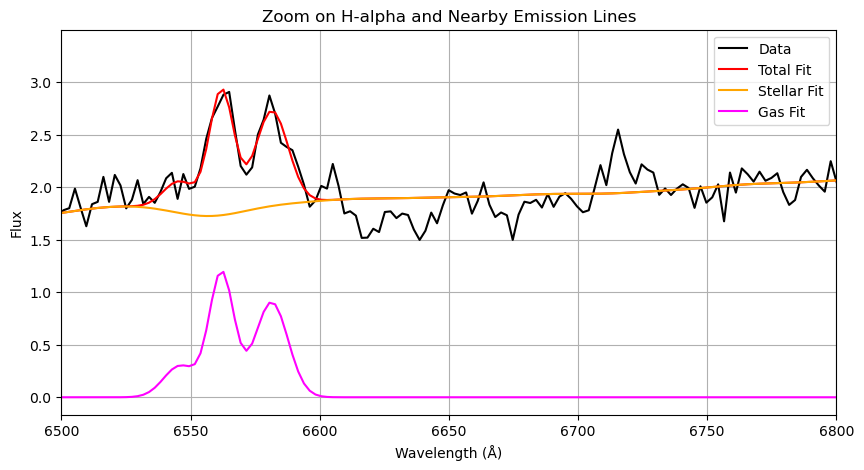

σ (km/s): 183.20

Window centre: 195


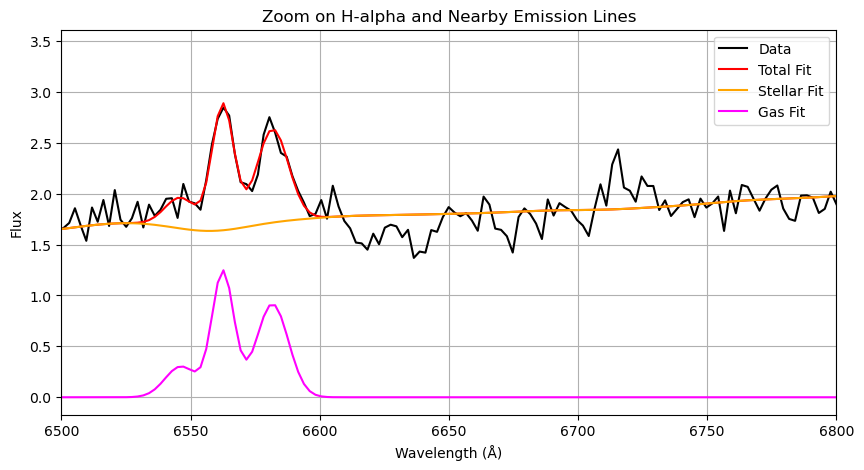

σ (km/s): 152.27

Window centre: 196


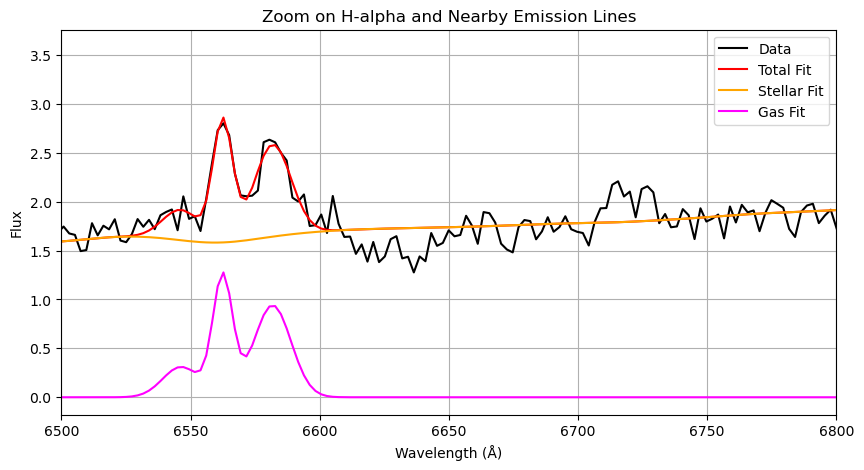

σ (km/s): 126.03

Window centre: 197


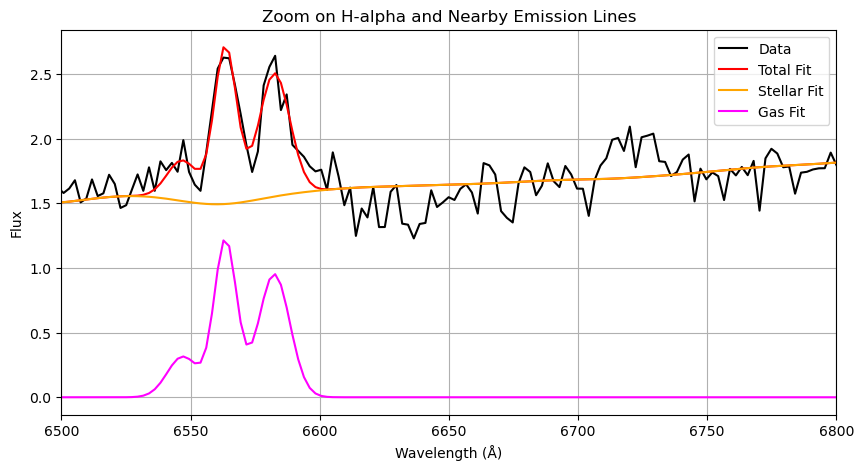

σ (km/s): 157.97

Window centre: 198


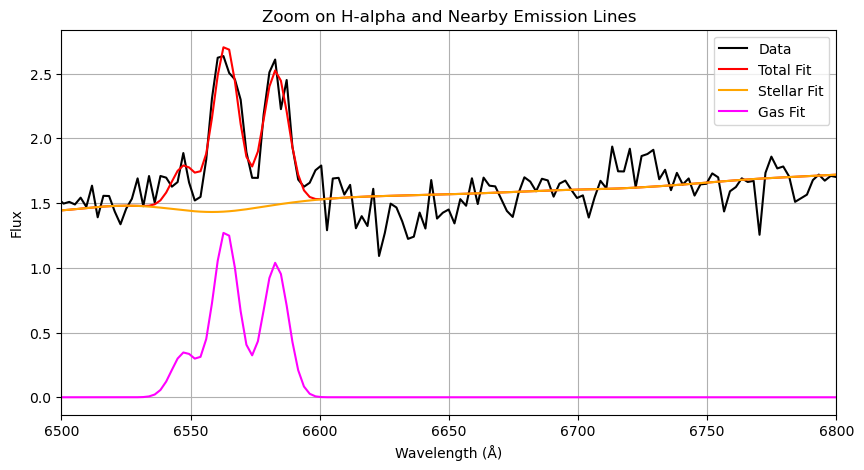

σ (km/s): 185.82

Window centre: 199


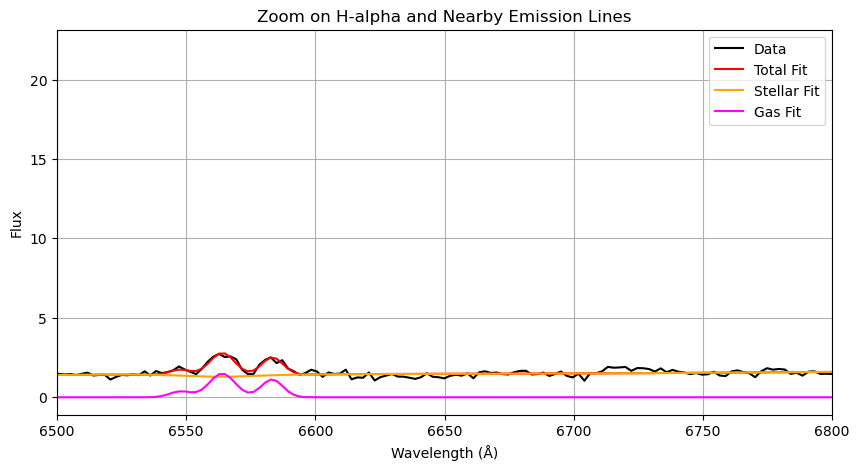

σ (km/s): 193.48

Window centre: 200


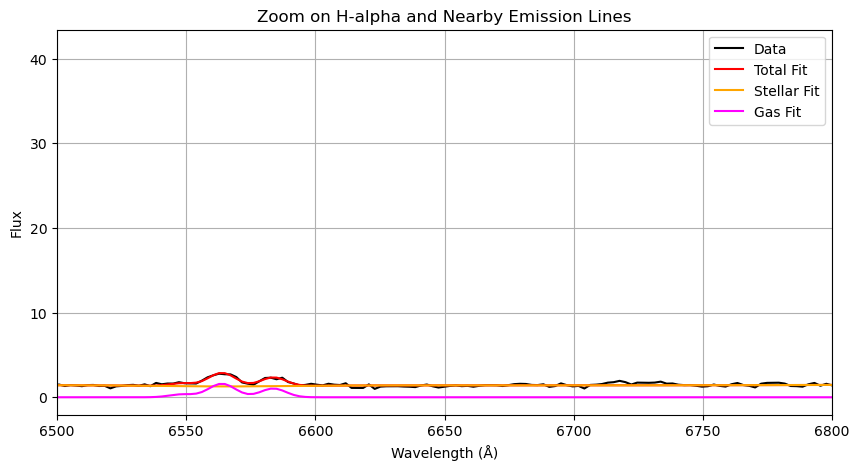

σ (km/s): 204.77

Window centre: 201


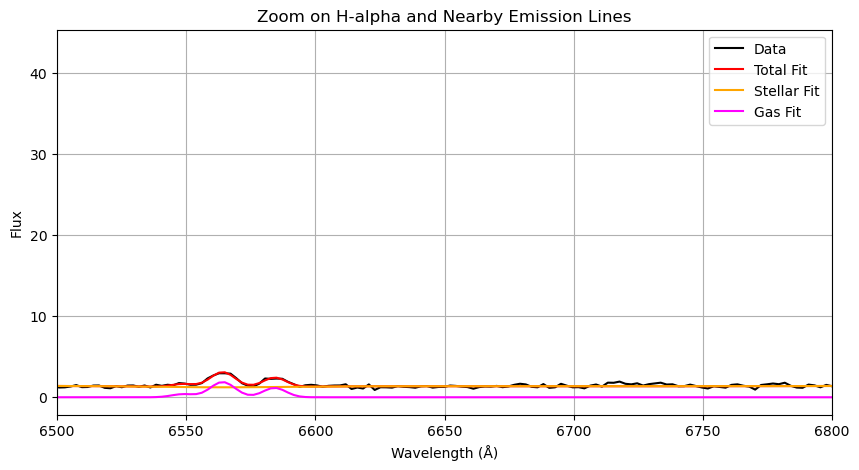

σ (km/s): 182.83

Window centre: 202


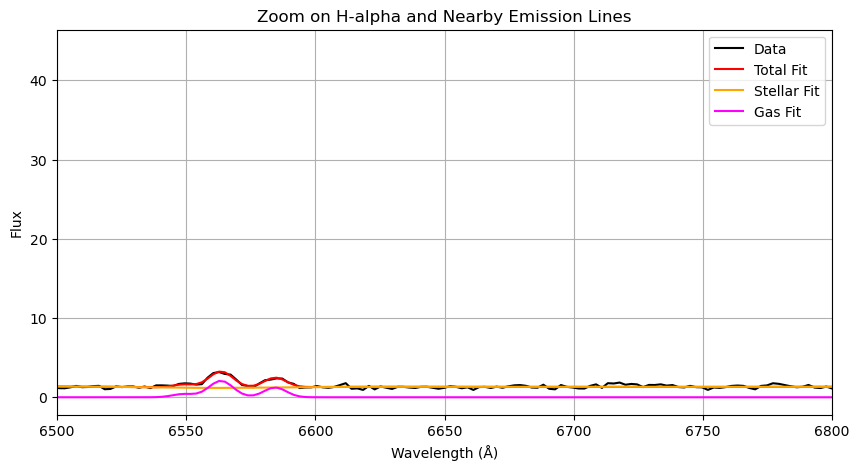

σ (km/s): 176.74

Window centre: 203


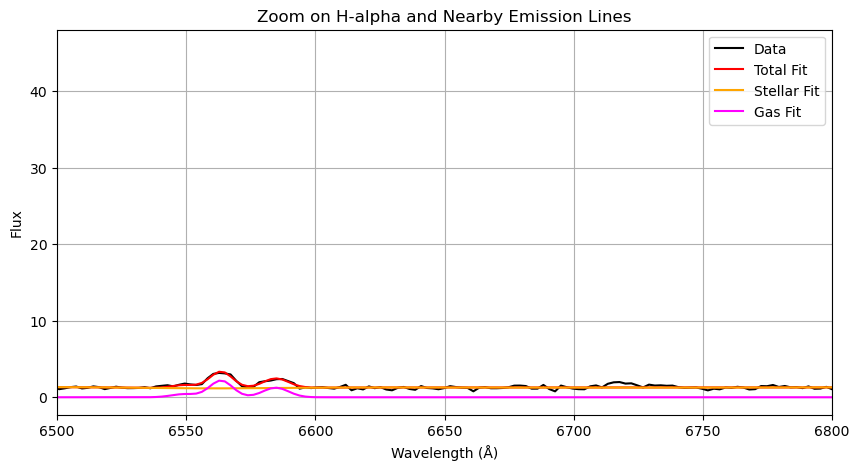

σ (km/s): 163.98

Window centre: 204


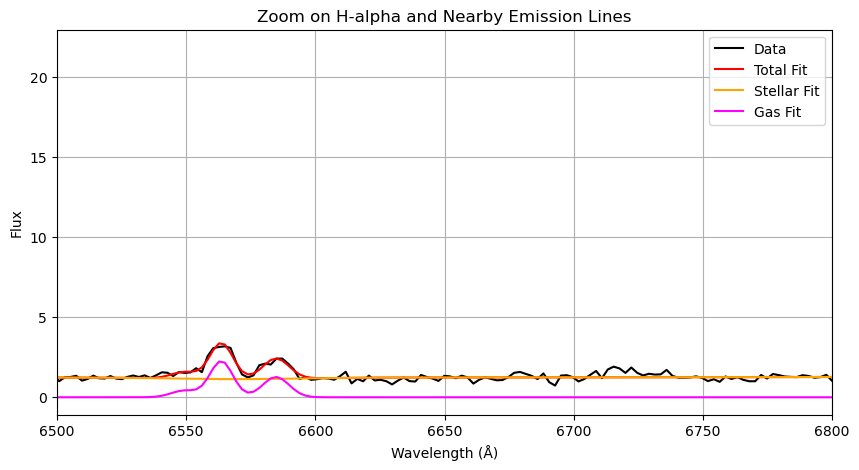

σ (km/s): 164.99

Window centre: 205


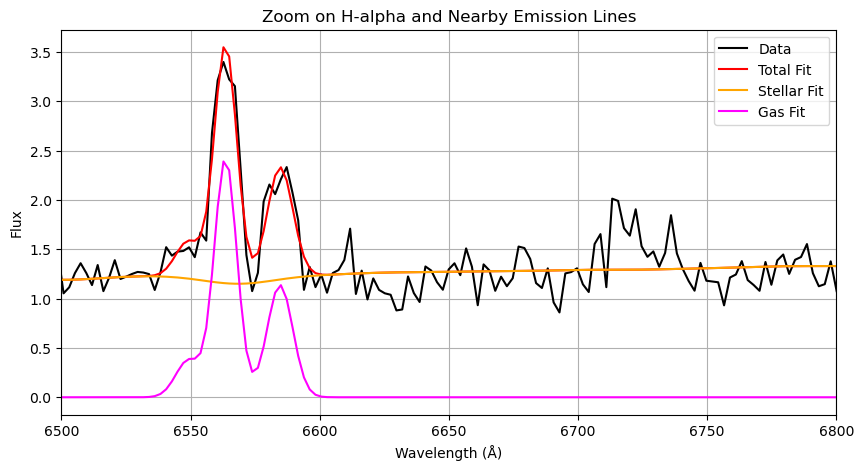

σ (km/s): 158.76

Window centre: 206


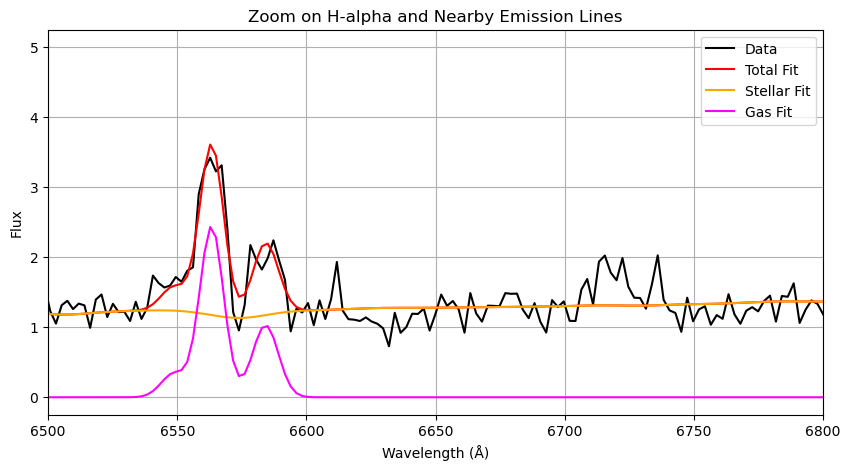

σ (km/s): 173.43

Window centre: 207


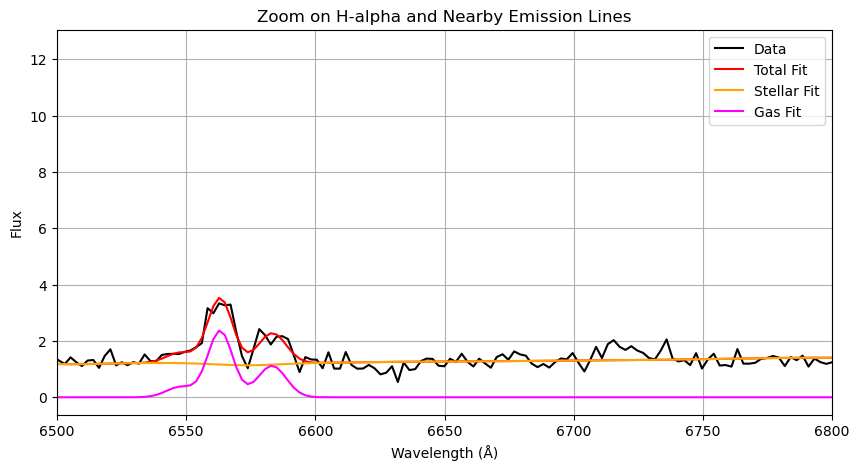

σ (km/s): 184.08

Window centre: 208


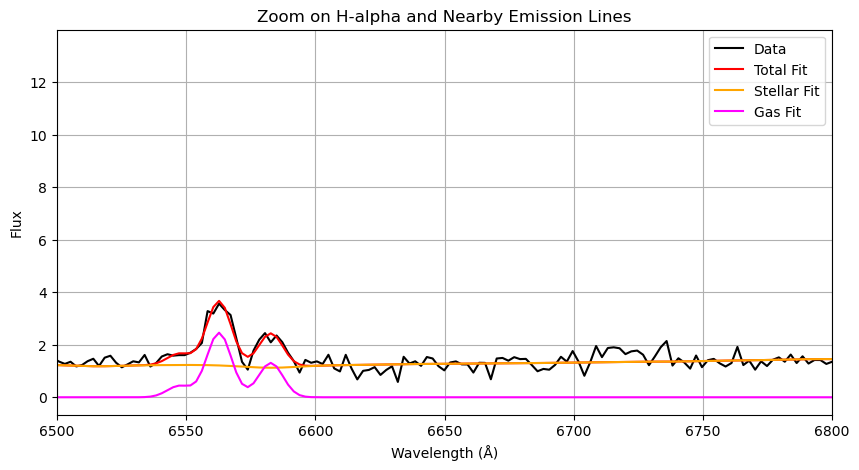

σ (km/s): 181.55

Window centre: 209


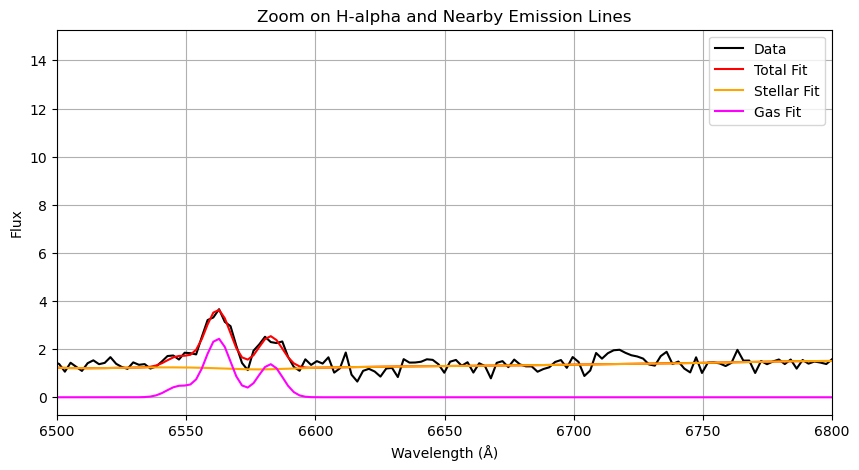

σ (km/s): 190.32

Window centre: 210


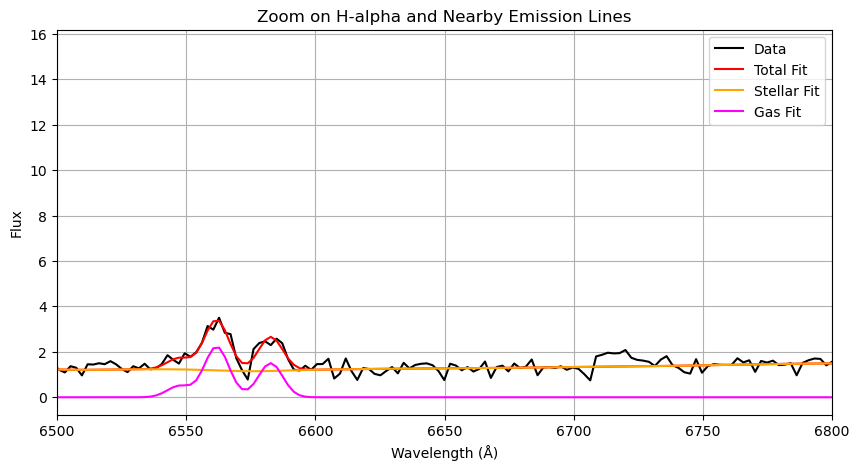

σ (km/s): 181.80

Window centre: 211


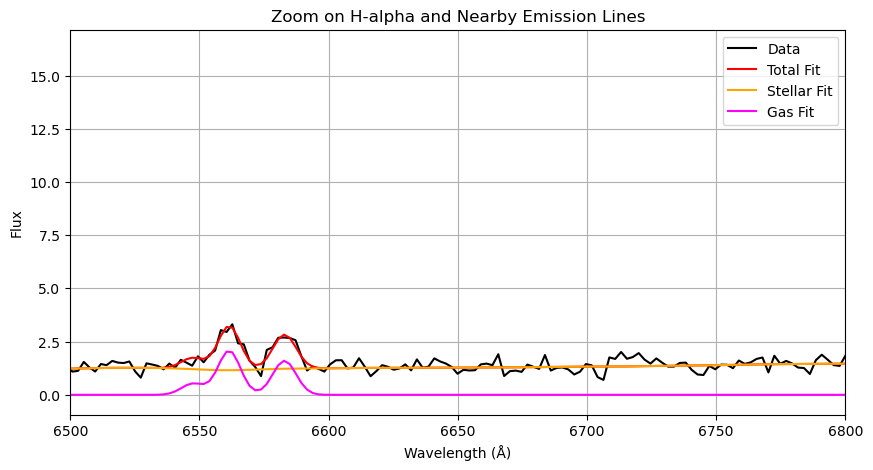

σ (km/s): 159.09

Window centre: 212


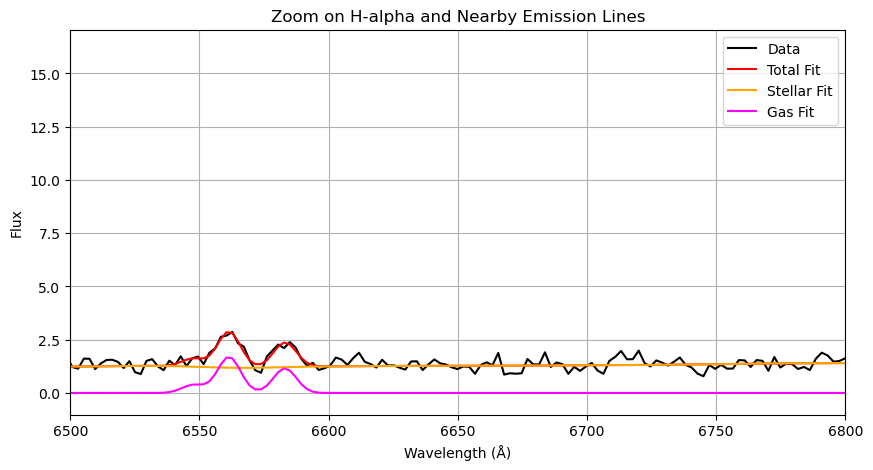

σ (km/s): 164.43

Window centre: 213


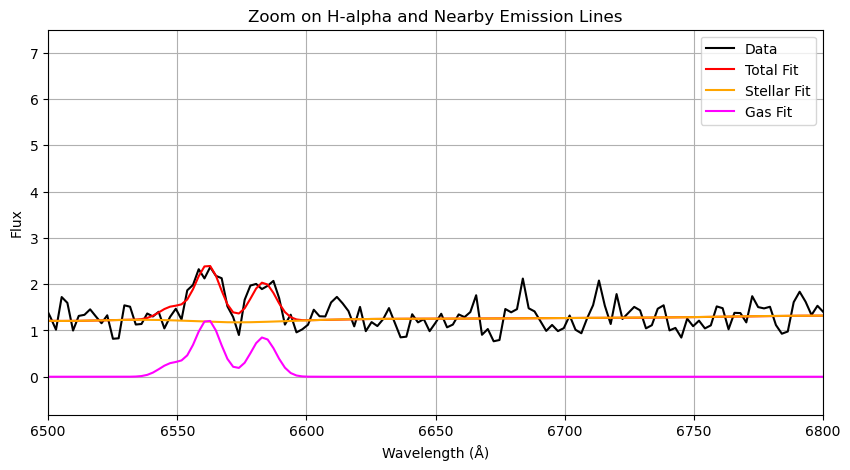

σ (km/s): 189.75

Window centre: 214


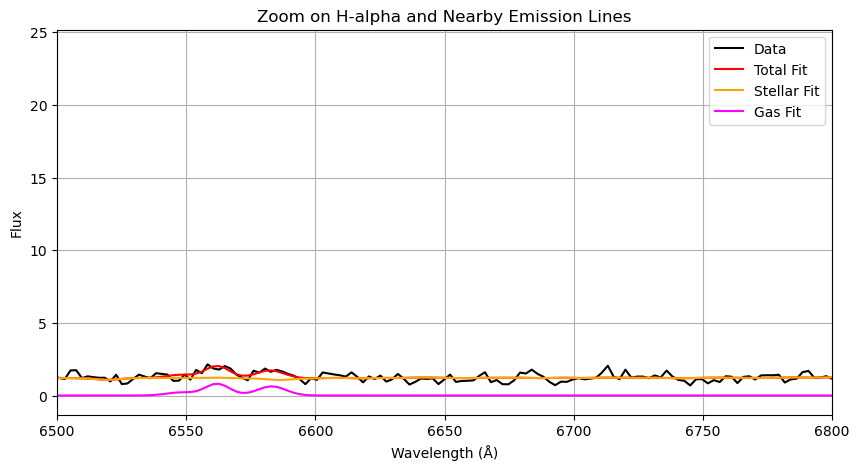

σ (km/s): 181.22

Window centre: 215


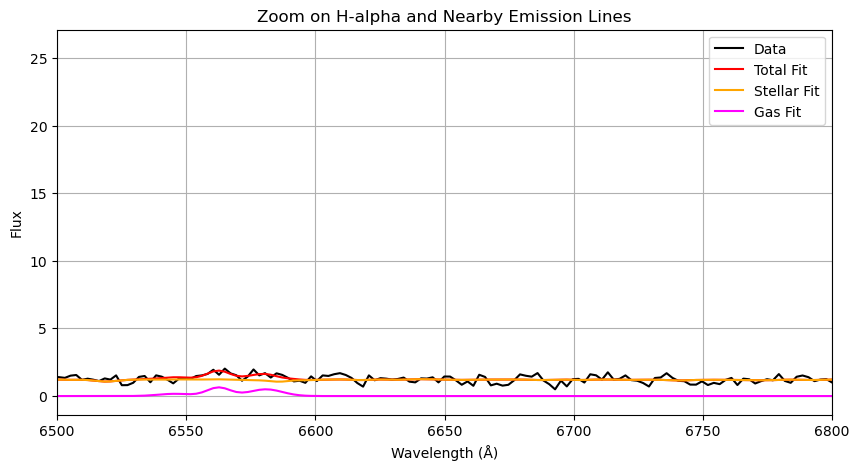

σ (km/s): 169.38

Window centre: 216


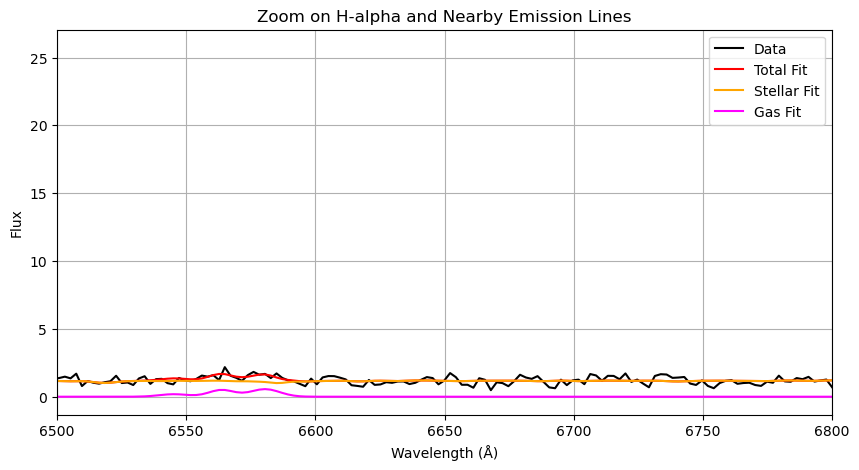

σ (km/s): 189.99

Window centre: 217


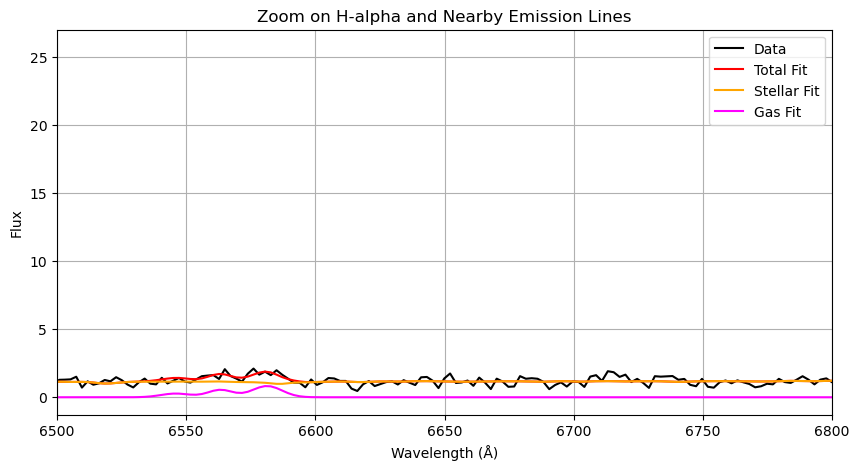

σ (km/s): 185.12

Window centre: 218


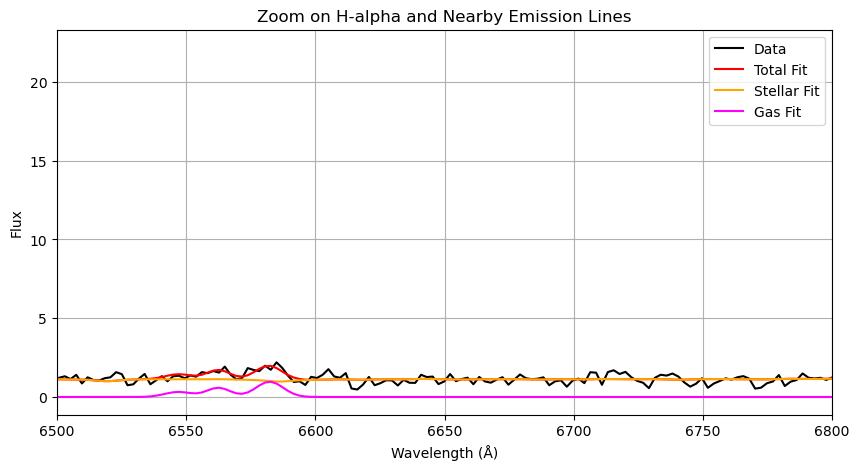

σ (km/s): 171.19

Window centre: 219


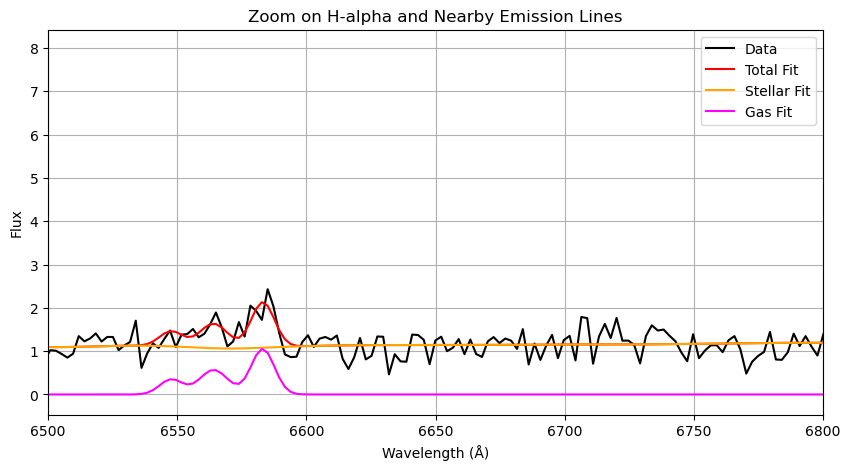

σ (km/s): 217.55

Window centre: 220


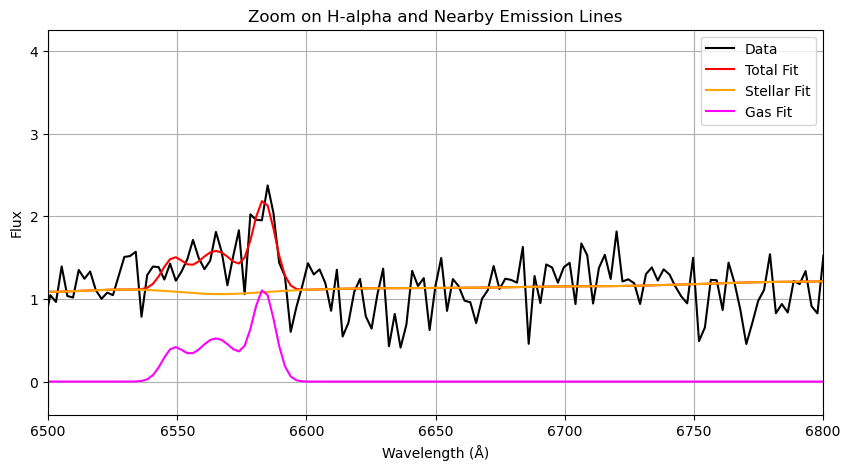

σ (km/s): 343.49

Window centre: 221


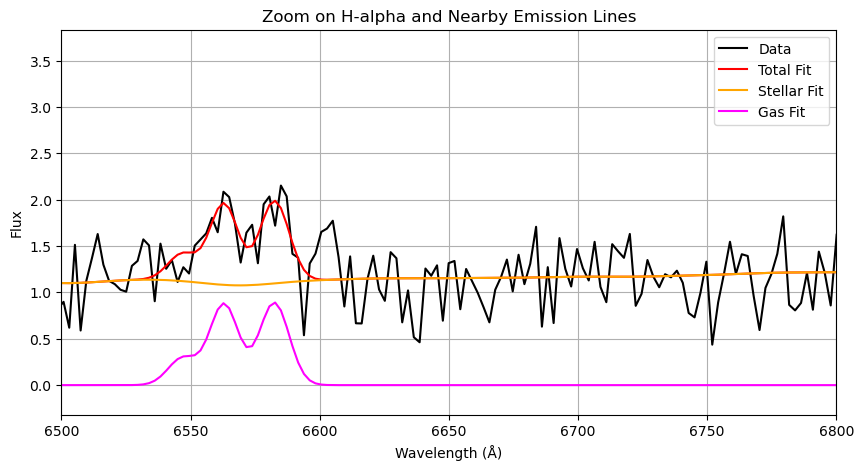

σ (km/s): 223.71

Window centre: 222


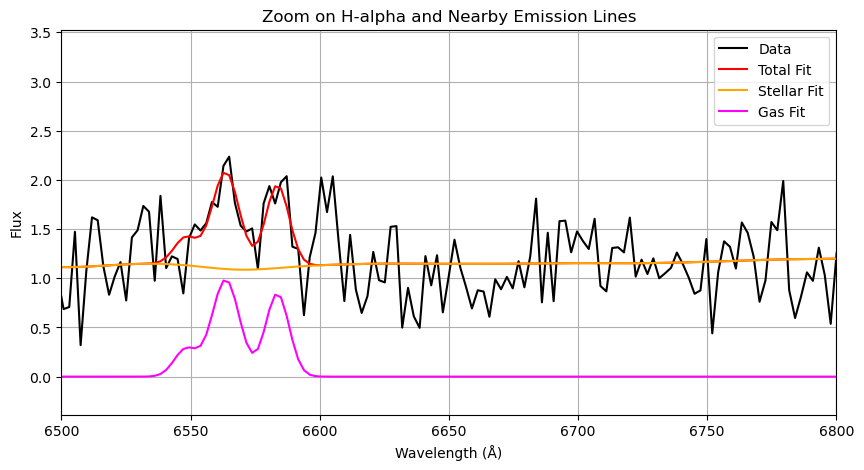

σ (km/s): 211.50

Window centre: 223


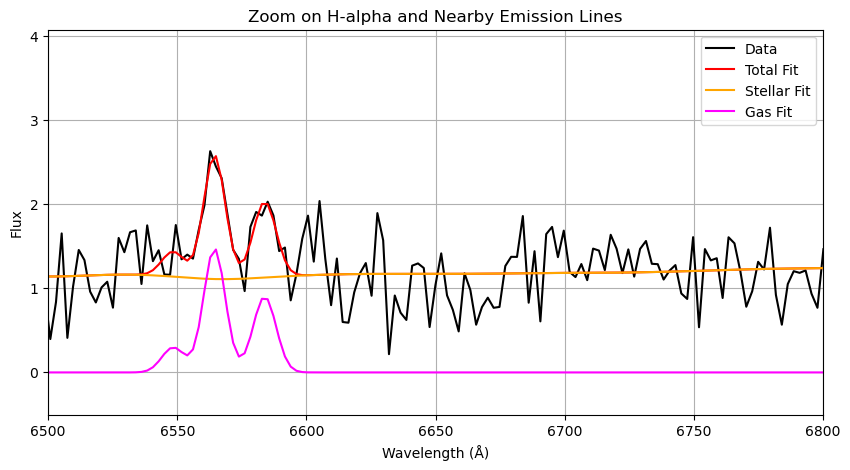

σ (km/s): 149.03

Window centre: 224


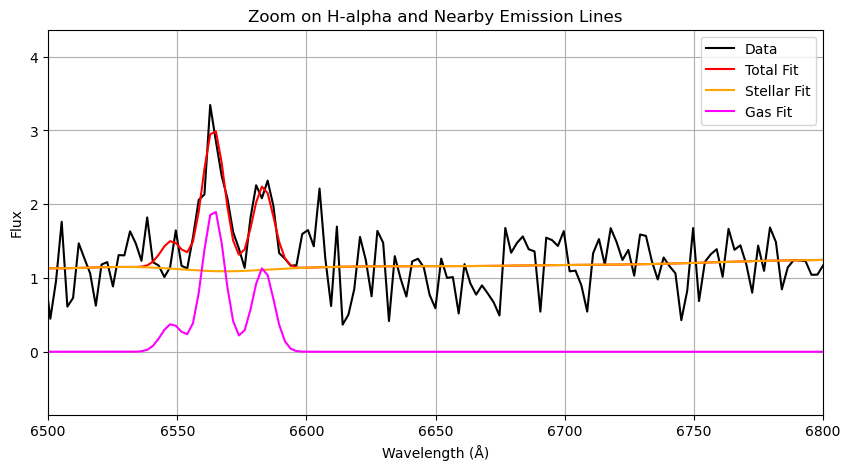

σ (km/s): 152.24

Window centre: 225


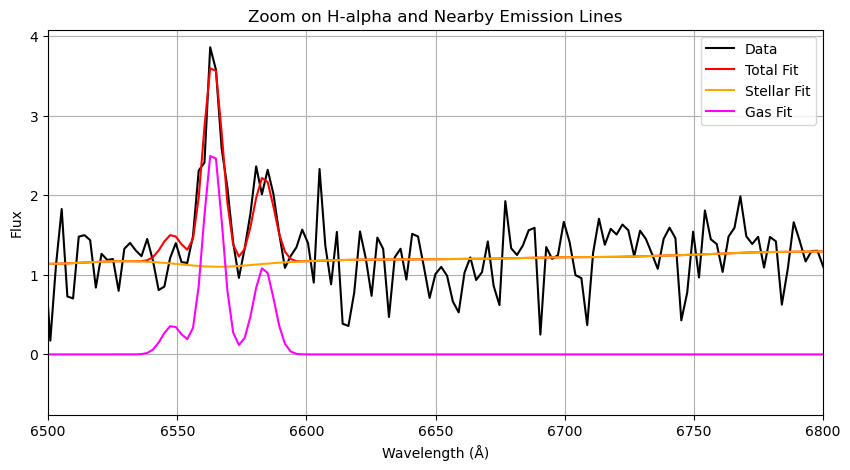

σ (km/s): 116.37

Window centre: 226


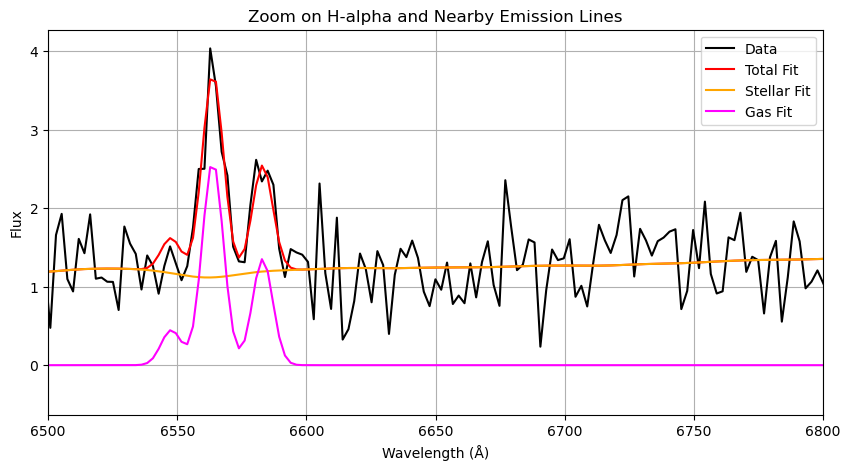

σ (km/s): 143.26

Window centre: 227


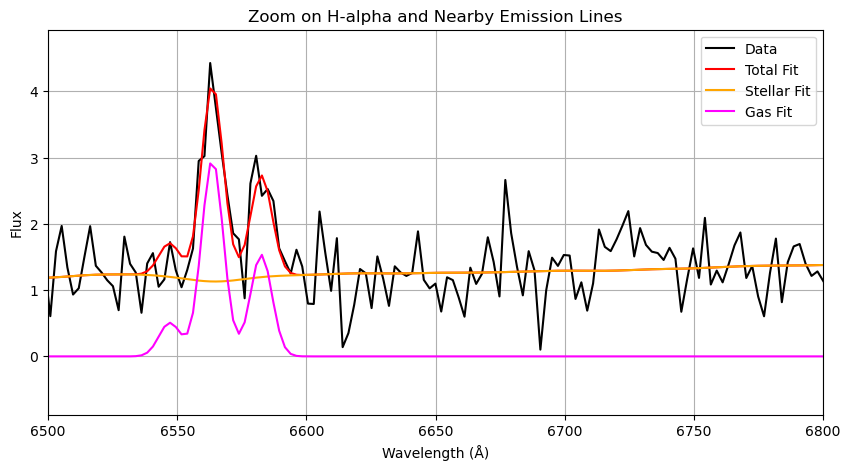

σ (km/s): 151.13

Window centre: 228


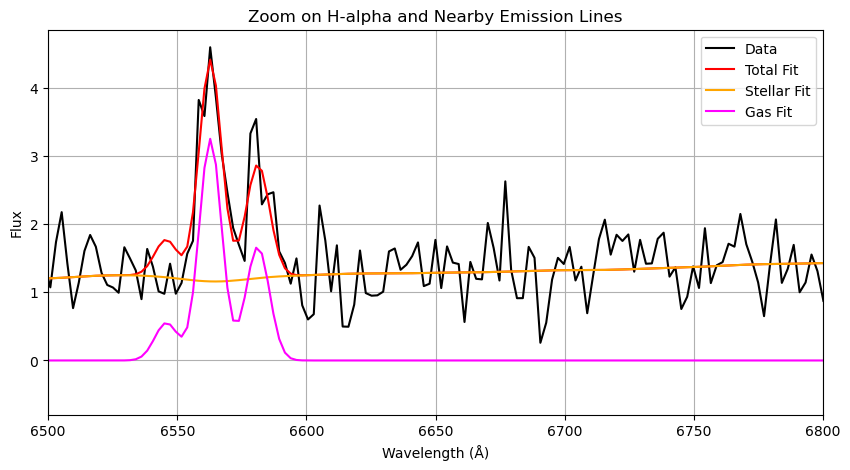

σ (km/s): 155.67

Window centre: 229


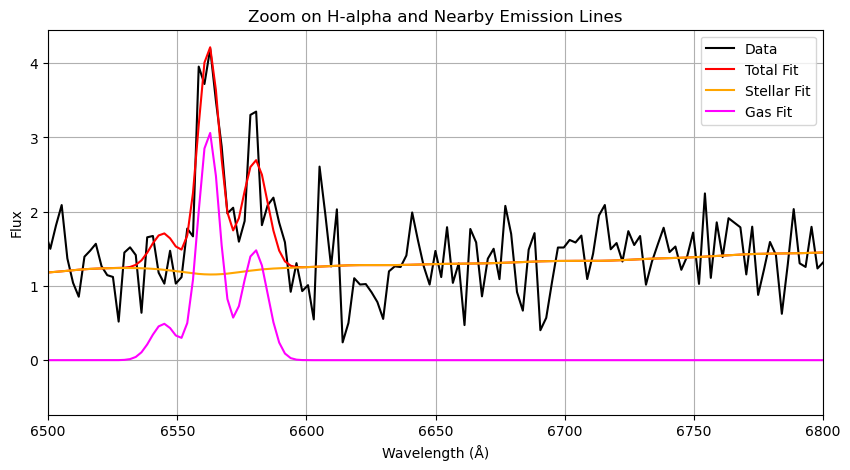

σ (km/s): 147.19

Window centre: 230


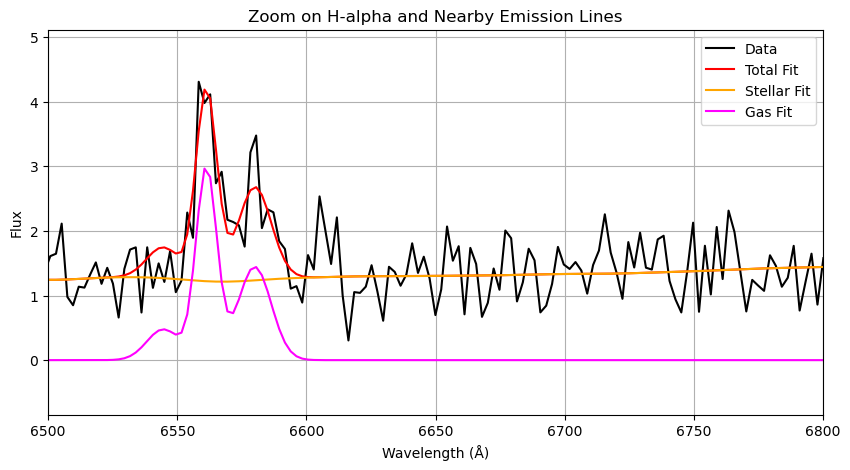

σ (km/s): 138.44

Window centre: 231


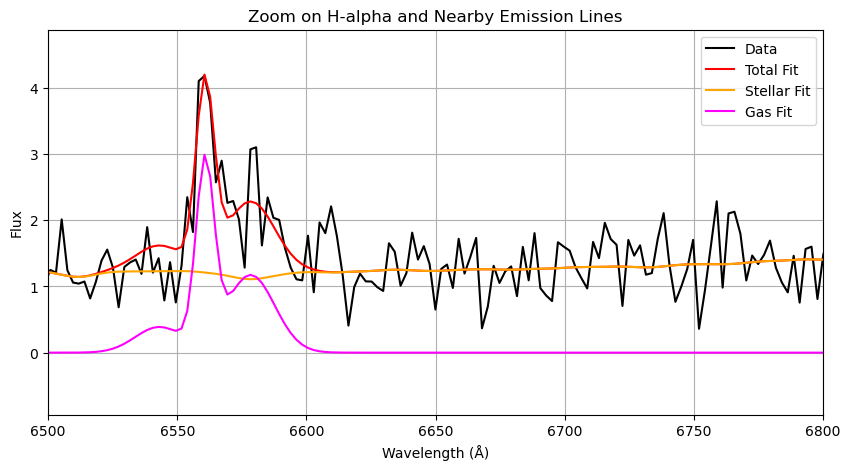

σ (km/s): 105.59

Window centre: 232


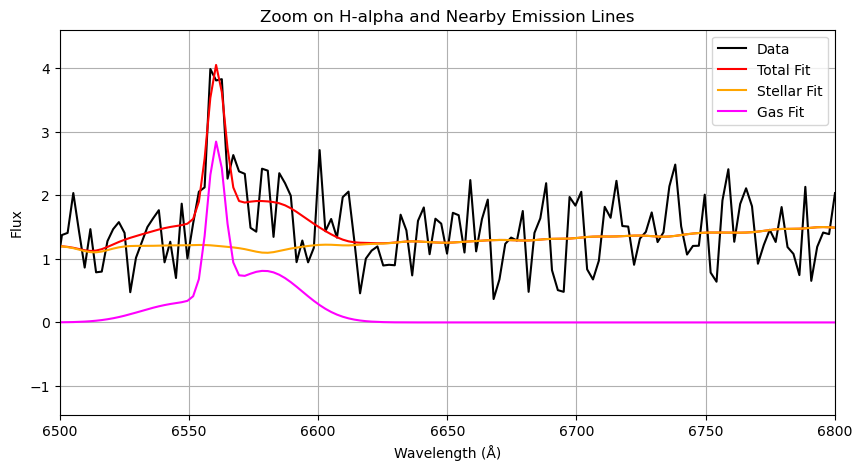

σ (km/s): 93.20

Window centre: 233


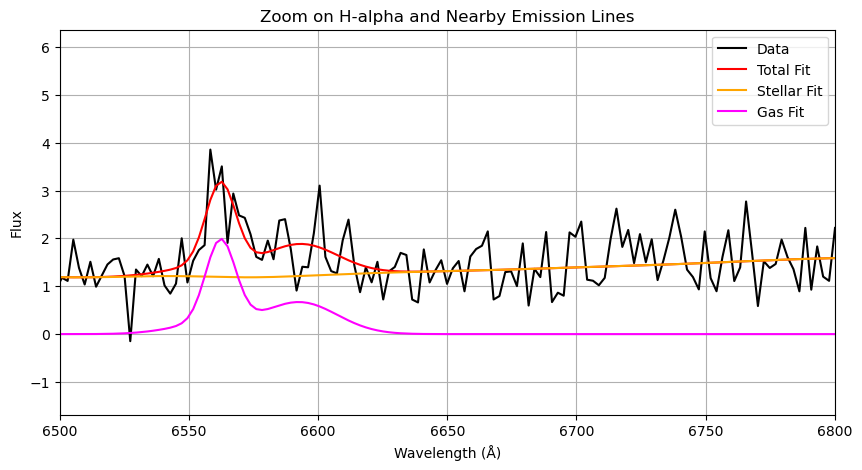

σ (km/s): 234.37

Window centre: 234


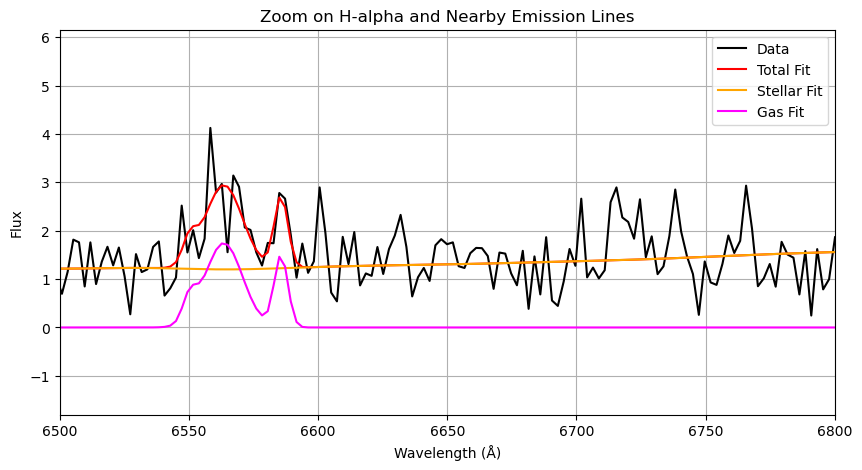

σ (km/s): 308.75

Window centre: 235


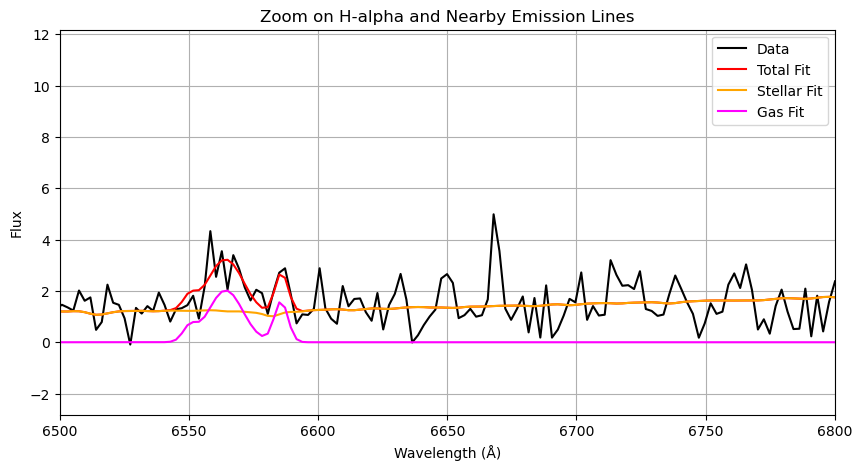

σ (km/s): 277.23

Window centre: 236


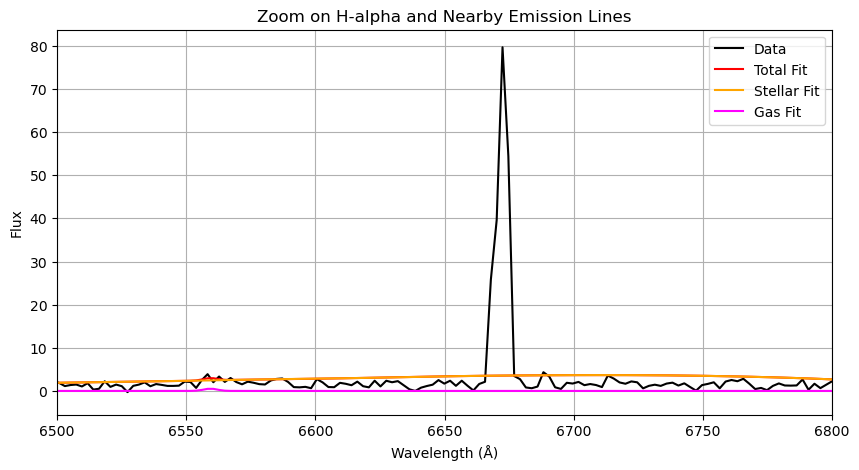

σ (km/s): 1.01

Window centre: 237


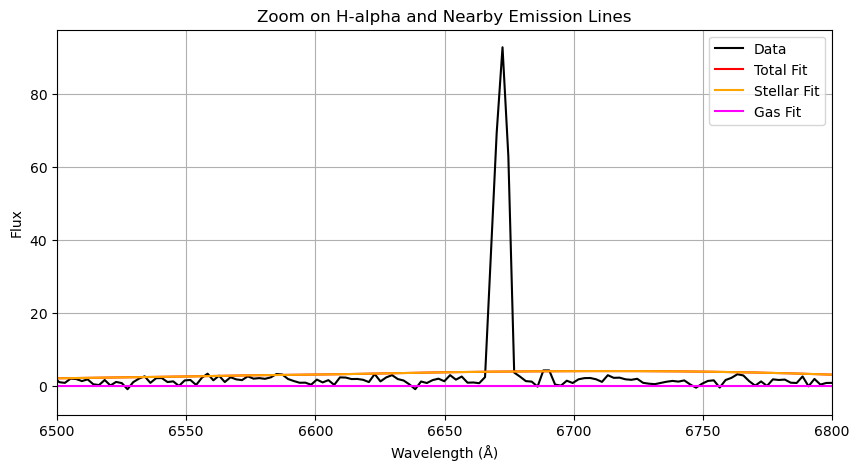

σ (km/s): 8.86

Window centre: 238


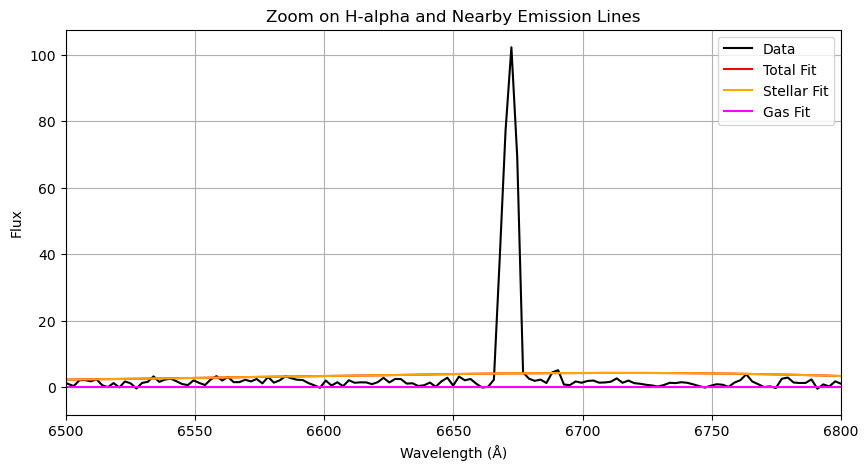

σ (km/s): 1.01

Window centre: 239


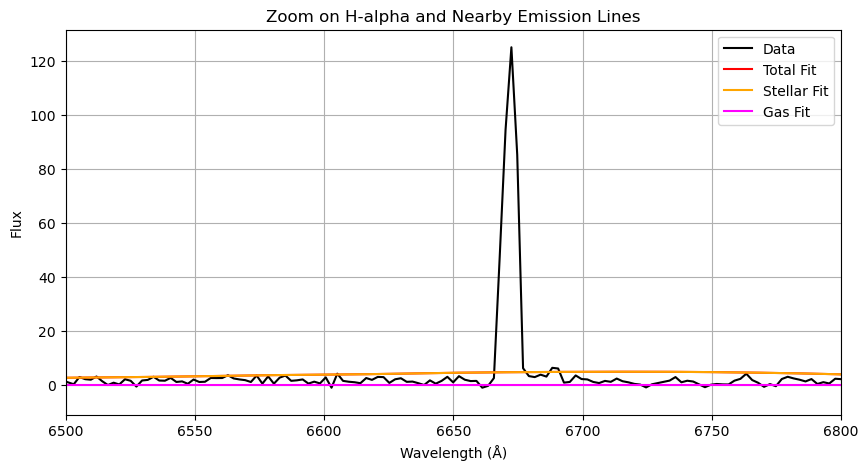

σ (km/s): 1.01

Window centre: 240


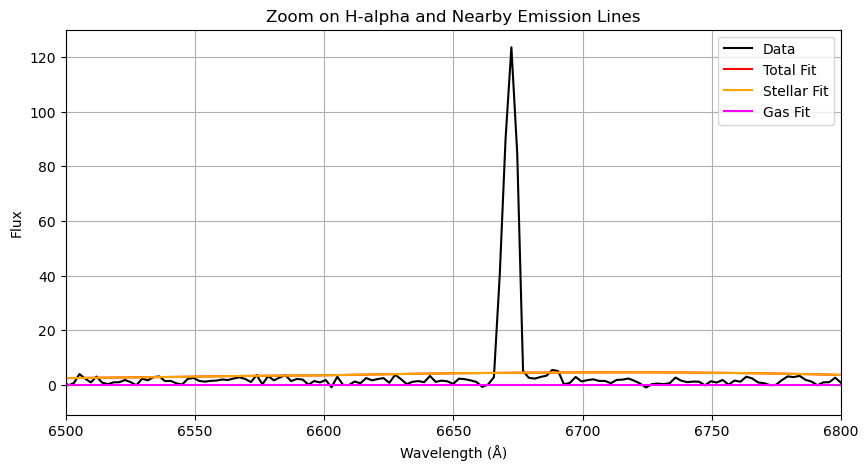

σ (km/s): 1.01

Window centre: 241


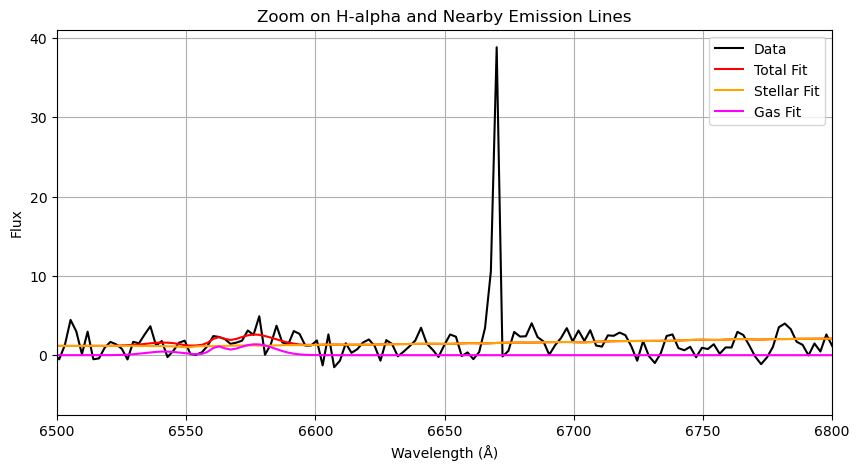

σ (km/s): 1.01

Window centre: 242


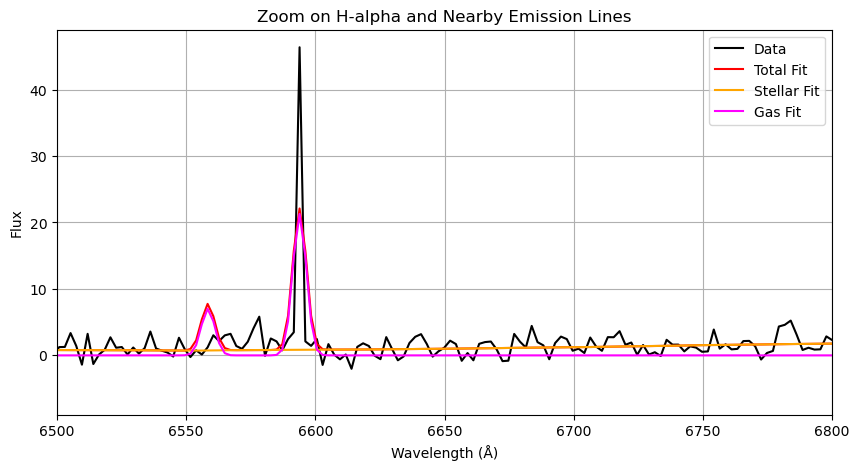

σ (km/s): 1000.00

Window centre: 243


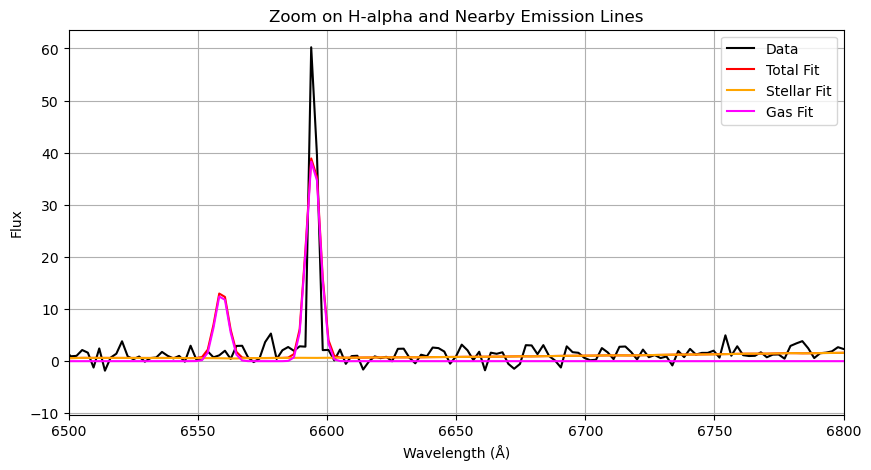

σ (km/s): 11.17

Window centre: 244


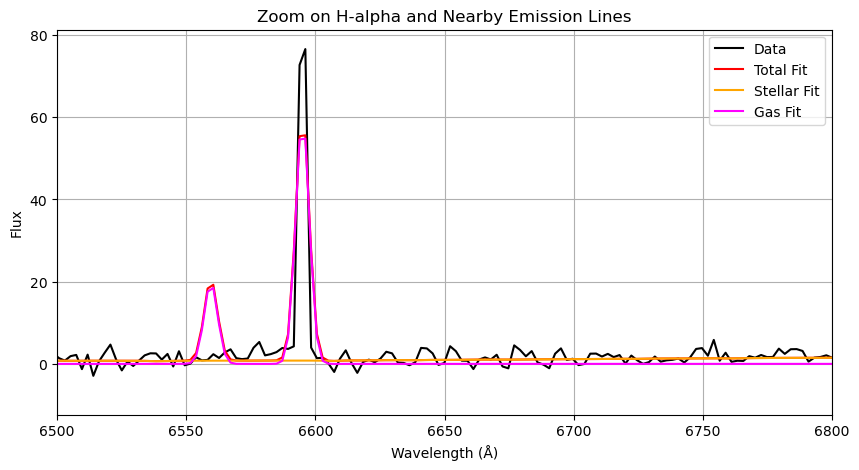

σ (km/s): 1.01

Window centre: 245


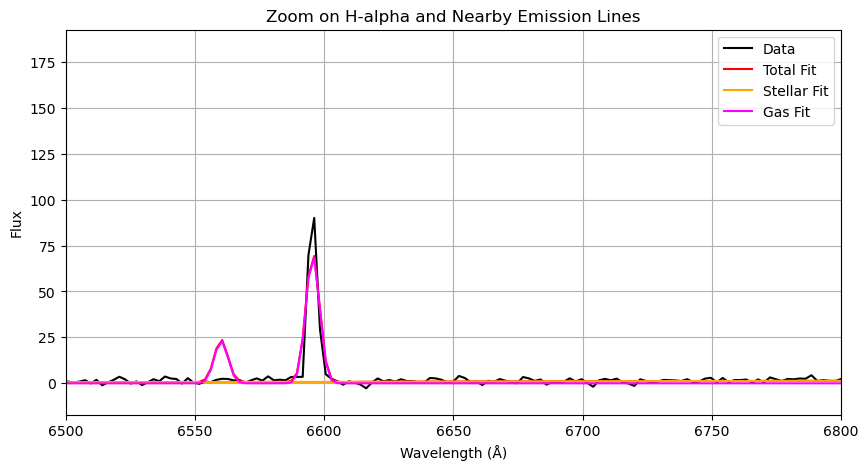

σ (km/s): 200.00

Window centre: 246


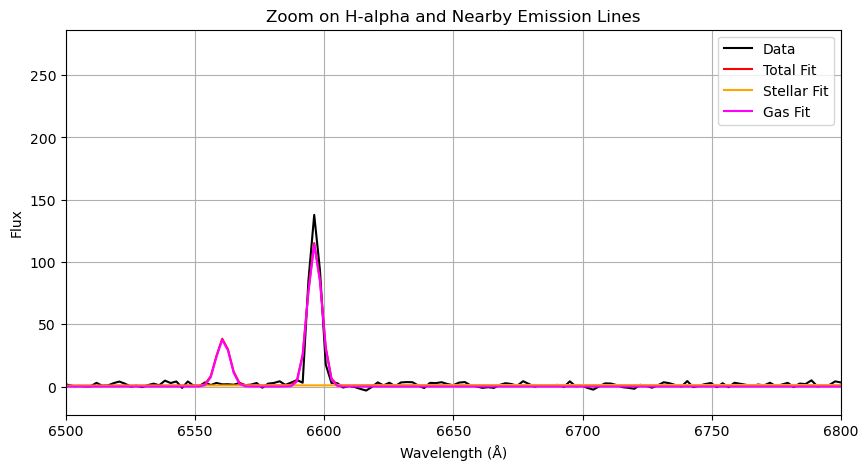

σ (km/s): 200.00

Window centre: 247


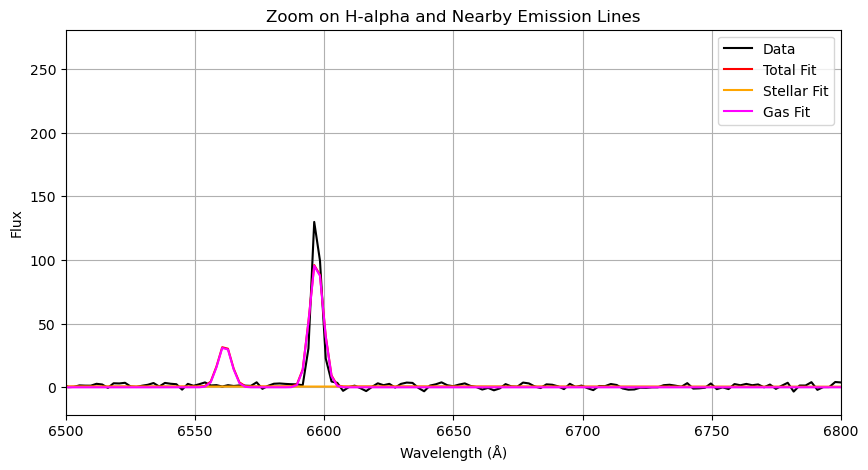

σ (km/s): 200.00



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)

    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_10513/3518839896.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_10513/3518839896.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)


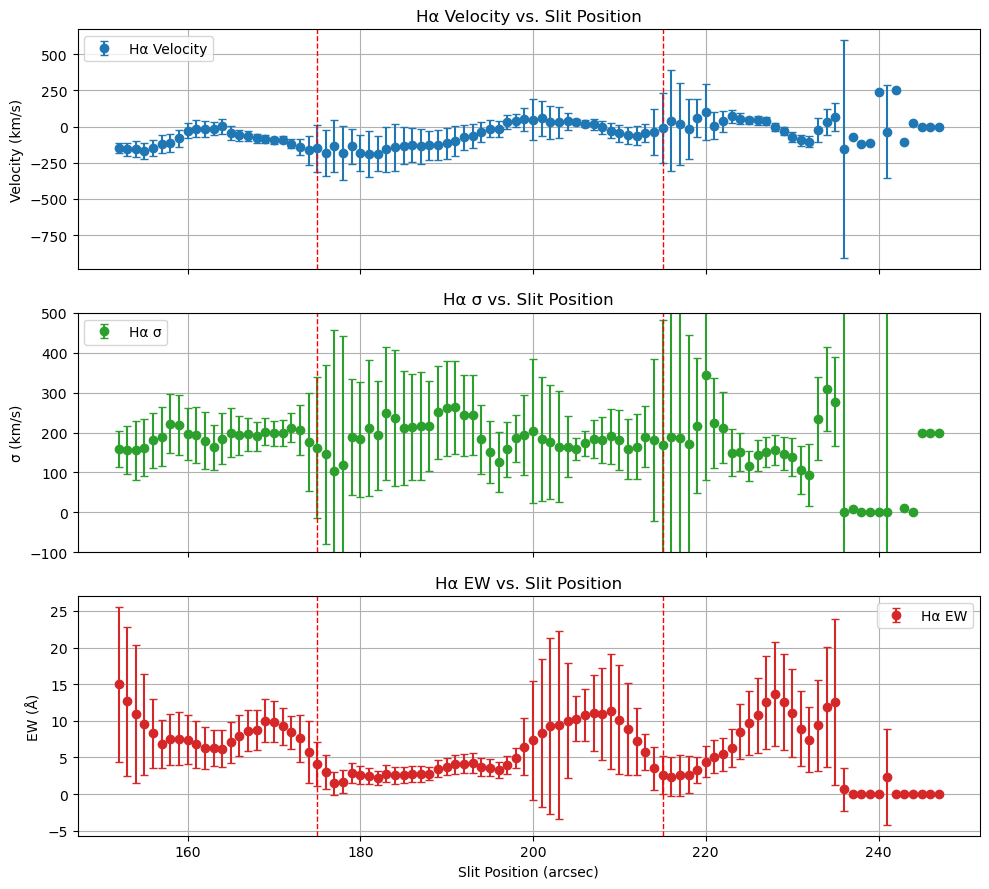

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/SB2_
          orth_halpha_results.csv', index=False)
